# **IMAGE GENERATION FROM OUTPUT**

In [1]:
import json
import requests
import urllib.parse
import os
from datetime import datetime
import time
from urllib.parse import quote
from dotenv import load_dotenv



# **CALL TO API**

In [2]:
def build_super_prompt(strategy):
    gen = strategy.get('image_generation_prompt', {})
    visual = strategy.get('visual_concept', {})
    style = strategy.get('color_and_style', {})
    mega_prompt = (
        f"{gen.get('prompt', '')}. "
        f"Aesthetic: {visual.get('background_style')}, {style.get('design_style')}. "
        f"Lighting: {visual.get('lighting_style')}. "
        f"Camera: {visual.get('camera_angle')}. "
        f"Palette: {', '.join(style.get('color_palette', []))}."
    )
    tags = ", ".join(gen.get('quality_tags', []))
    final_output = f"{mega_prompt} {tags}"
    
    return final_output



In [3]:

load_dotenv()

if os.environ.get('POLLINATION_API_KEY'):
    print("API Key is present")
else:
    raise ValueError("API Key is not present")

FOLDER = "pinterest_images"
POLLINATION_API_KEY = os.environ.get('POLLINATION_API_KEY')
def generate_with_key(super_prompt):
    if not os.path.exists(FOLDER):
        os.makedirs(FOLDER, exist_ok=True)
    url = f"https://gen.pollinations.ai/image/{quote(super_prompt)}?width=1080&height=1920&model=flux&nologo=true"
    headers = {
        "Authorization": f"Bearer {POLLINATION_API_KEY}" 
    }

    try:
        print(f"📡 Requesting with API Key (Spore Tier)...")
        response = requests.get(url, headers=headers, timeout=60)
        if response.status_code == 200 and len(response.content) > 50000:
            path = os.path.join(FOLDER, f"pin_{int(time.time())}.jpg")
            with open(path, 'wb') as f:
                f.write(response.content)
            print(f"✅ SUCCESS: Saved {len(response.content)} bytes.")
            return path
        else:
            print(f"❌ Error {response.status_code}: {response.text[:100]}")
            return None
    except Exception as e:
        print(f"❌ Connection Error: {e}")
        return None

API Key is present


# **OUTPUT**

🚀 Optimized Prompt: A high-end, editorial photograph of a minimalist aesthetic desk setup. Features ...
📡 Requesting with API Key (Spore Tier)...
✅ SUCCESS: Saved 73549 bytes.
✅ Success! Image saved at pinterest_images\pin_1770205194.jpg


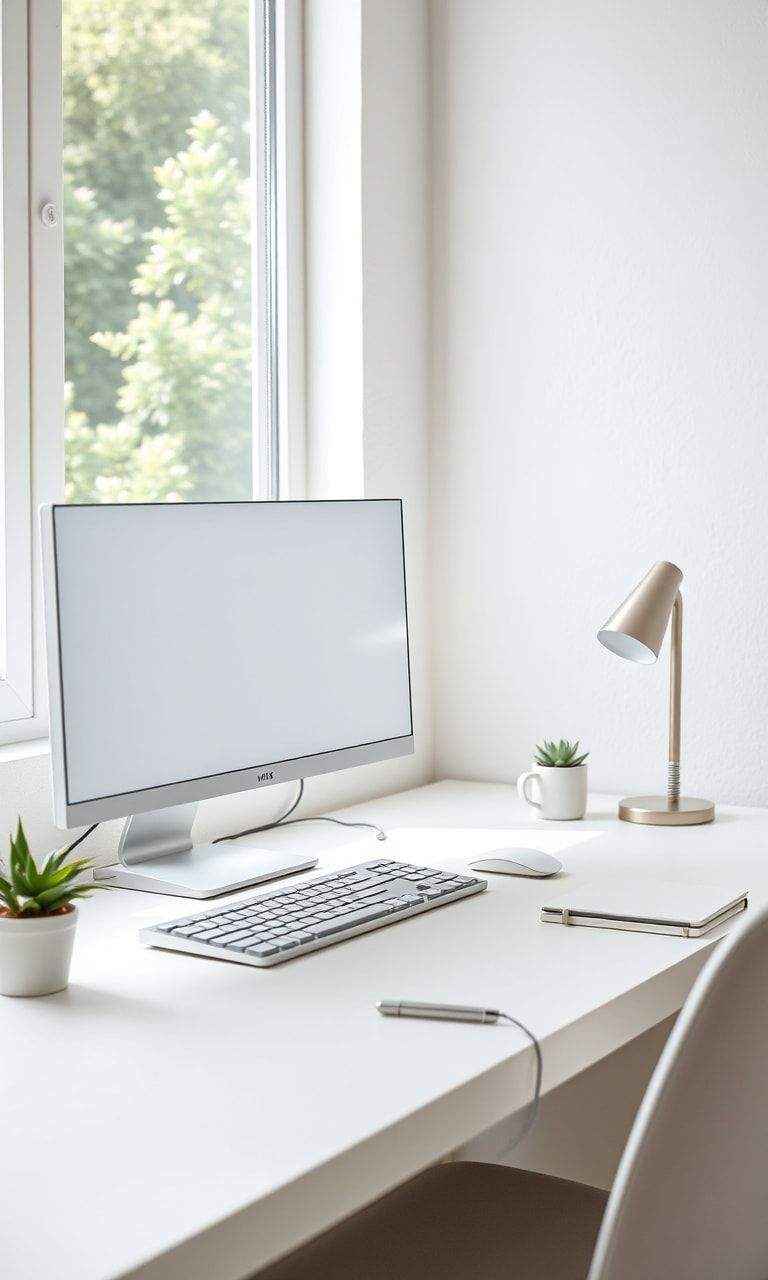

In [5]:
with open('current_strategy.json', 'r') as f:
    strategy = json.load(f)

final_visual_instruction = build_super_prompt(strategy)
print(f"🚀 Optimized Prompt: {final_visual_instruction[:80]}...")

img_path = generate_with_key(final_visual_instruction)

if img_path:
    print(f"✅ Success! Image saved at {img_path}")
    from IPython.display import Image, display
    display(Image(filename=img_path))